In [6]:
import os
import sys
sys.path.append(os.path.abspath('../'))
from datetime import datetime,timedelta
import dateutil.parser
import dateutil.rrule
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import types
from joblib import Parallel, delayed
import metgrs
from metgrs import WindProfileRadar
import glob

In [3]:
metgrs.__version__

'0.4.1'

In [4]:
datapath='../datas/'

# 读取风廓线雷达功率谱数据并绘图

In [7]:
fftfs=sorted(glob.glob(datapath+'/WindProfileRadarFiles/20241204/WIND_FFT/*'))

In [33]:
fftfs[0]

'../datas//WindProfileRadarFiles/20241204/WIND_FFT\\Z_RADA_I_57461_20241203160000_O_WPRD_LC_FFT.BIN'

WindProfileRadar.readSingleL1file 是读取单个功率谱文件的接口

In [10]:
di=WindProfileRadar.readSingleL1file(fftfs[0])

In [26]:
da=di['Datas'][0]['DspToDpDat']

In [27]:
da

<xarray.DataArray (Beam: 5, height: 35, Fft: 256)> Size: 179kB
array([[[ 1.0939564 ,  1.1428783 ,  1.5014124 , ...,  1.503142  ,
          1.4011996 ,  1.304668  ],
        [ 3.4994516 ,  4.260887  ,  5.345643  , ...,  4.0132847 ,
          5.0640736 ,  5.695082  ],
        [ 8.840972  ,  7.870458  ,  5.97723   , ...,  7.726806  ,
          4.0457587 ,  4.830588  ],
        ...,
        [ 6.7452803 ,  8.147042  ,  8.550667  , ...,  6.1659493 ,
          5.4262524 ,  6.6297936 ],
        [ 7.5335546 ,  5.9703526 ,  6.088355  , ...,  7.9891386 ,
          8.443061  ,  8.147042  ],
        [ 5.7809606 ,  8.375292  ,  7.594513  , ...,  6.5539026 ,
          6.251727  ,  5.0292125 ]],

       [[ 0.55718577,  1.1194379 ,  1.4223288 , ...,  0.8780111 ,
          1.0727537 ,  1.0483348 ],
        [ 4.769798  ,  6.060382  ,  5.2662315 , ...,  4.2461953 ,
          2.0606298 ,  3.7975194 ],
        [ 6.516283  ,  4.983104  ,  6.187283  , ...,  7.870458  ,
          6.7142878 ,  7.4644866 ],
...
        [ 7.0307236 ,  6.2589283 ,  6.032537  , ...,  6.918309  ,
          7.516229  ,  7.4301915 ],
        [ 8.443061  ,  8.26038   ,  8.73977   , ...,  7.177942  ,
          7.6559663 ,  8.540828  ],
        [ 5.881661  ,  7.421642  ,  6.675749  , ...,  9.354056  ,
          9.130613  ,  7.4903135 ]],

       [[ 1.2203938 ,  1.2618276 ,  1.0777053 , ...,  1.023293  ,
          0.9549926 ,  1.1078986 ],
        [ 4.456562  ,  5.3703175 ,  5.3088446 , ...,  4.8977876 ,
          4.7315125 ,  4.555122  ],
        [ 6.1730523 ,  7.664786  ,  8.820638  , ...,  5.8344507 ,
          6.0255957 ,  6.095369  ],
        ...,
        [ 5.4200087 ,  7.219382  ,  6.3386965 , ...,  5.1582217 ,
          6.1517687 ,  6.2589283 ],
        [ 9.671637  ,  7.9341426 ,  5.470159  , ...,  7.186211  ,
          7.1449633 , 10.232928  ],
        [ 9.015712  ,  7.219382  ,  7.404572  , ...,  7.219382  ,
          6.6988463 ,  8.759917  ]]], dtype=float32)
Coordinates:
  * Beam     (Beam) <U1 20B 'E' 'N' 'R' 'W' 'S'
  * height   (height) int32 140B 150 270 390 510 630 ... 3870 3990 4110 4230
  * Fft      (Fft) int32 1kB 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254 255
Attributes:
    WaveLength:                220
    Prp:                       27777.777
    ObStarTime:                2024-12-03 15:54:00
    ObEndTime:                 2024-12-03 16:00:00
    Speed_per_FFT_point:       0.1193576370239258
    WaveLength_unit:           1e-5 meter
    Prp_unit:                  Hz
    Speed_per_FFT_point_unit:  m/s
    height_unit:               meter

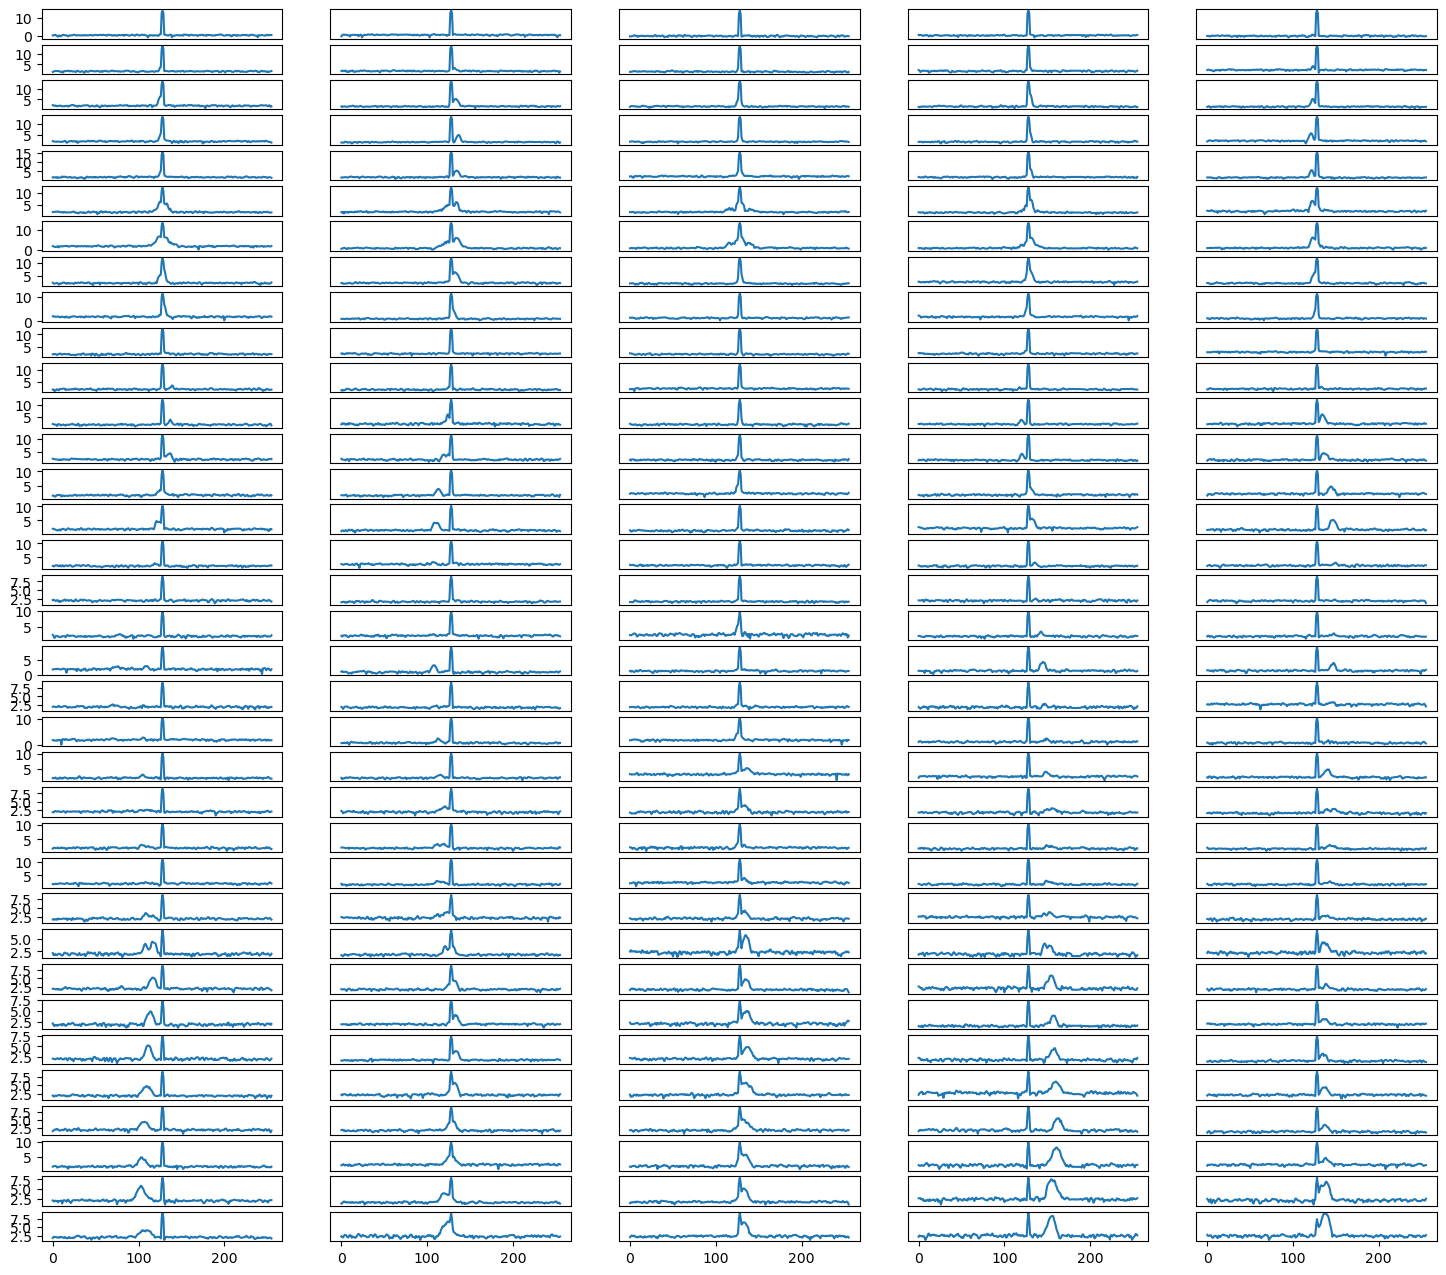

In [32]:
fig, axs = plt.subplots(figsize=(18,16),nrows = 35, ncols = 5)
for i in range(35):
   for j in range(5):
       x = da.Fft
       y = np.log(da[j,i])
       axs[i][j].plot(x, y)
       # 除了最下面一行的子图，隐藏横坐标
       if i < 34:
           axs[i][j].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
       if j >0:
           axs[i][j].tick_params(axis='y', which='both', left=False, labelleft=False)

# 读取L2径向风速

In [34]:
L2fs=sorted(glob.glob(datapath+'/WindProfileRadarFiles/20241204/WIND_RAD/*'))

In [37]:
l2d=WindProfileRadar.readSingleL2file(L2fs[0])

In [42]:
l2d['levels'][0].data

,Sampling_Height,E_Velocity_Spectrum_Width,E_Signal_To_Noise_Ratio,E_Radial_Velocity,N_Velocity_Spectrum_Width,N_Signal_To_Noise_Ratio,N_Radial_Velocity,R_Velocity_Spectrum_Width,R_Signal_To_Noise_Ratio,R_Radial_Velocity,W_Velocity_Spectrum_Width,W_Signal_To_Noise_Ratio,W_Radial_Velocity,S_Velocity_Spectrum_Width,S_Signal_To_Noise_Ratio,S_Radial_Velocity
0,150,0.1,5.4,-0.0,0.0,3.6,0.4,0.0,-1.9,-0.1,0.1,4.7,0.2,0.0,5.8,-0.6
1,270,0.0,13.4,-0.2,0.1,11.7,0.4,0.0,9.4,-0.1,0.0,12.0,0.1,0.0,12.6,-0.6
2,390,0.0,25.8,-0.2,0.1,24.2,0.6,0.0,23.6,-0.1,0.0,25.4,0.2,0.1,23.2,-0.5
3,510,0.0,21.1,-0.1,0.0,21.7,1.0,0.0,17.7,0.0,0.0,21.2,0.1,0.1,23.0,-0.8
4,630,0.1,19.8,-0.1,0.1,21.1,0.8,0.1,18.1,0.0,0.0,23.9,0.2,0.1,21.2,-0.7
5,750,0.2,27.3,-0.0,0.4,26.7,0.3,0.2,28.2,-0.0,0.1,29.3,0.2,0.1,27.4,-0.6
6,870,0.3,30.4,-0.1,0.4,29.8,0.5,0.2,31.6,0.0,0.1,29.2,0.3,0.1,29.0,-0.5
7,990,0.0,28.7,0.1,0.1,29.1,0.5,0.0,24.8,0.1,0.1,27.6,0.1,0.0,29.1,-0.2
8,1110,0.0,26.3,0.1,0.0,25.9,0.2,0.0,11.7,-0.0,0.0,22.5,-0.1,0.0,23.7,-0.1
9,1230,0.1,9.9,0.3,0.0,10.9,0.0,0.0,11.5,-0.0,0.1,11.0,-0.2,0.2,11.6,0.2


In [43]:
l2d['levels'][1].data

,Sampling_Height,E_Velocity_Spectrum_Width,E_Signal_To_Noise_Ratio,E_Radial_Velocity,N_Velocity_Spectrum_Width,N_Signal_To_Noise_Ratio,N_Radial_Velocity,R_Velocity_Spectrum_Width,R_Signal_To_Noise_Ratio,R_Radial_Velocity,W_Velocity_Spectrum_Width,W_Signal_To_Noise_Ratio,W_Radial_Velocity,S_Velocity_Spectrum_Width,S_Signal_To_Noise_Ratio,S_Radial_Velocity
0,1470,0.2,23.4,1.0,0.1,23.4,-0.4,0.0,23.9,0.0,0.2,22.2,-0.8,0.1,24.3,0.7
1,1710,0.5,24.5,-0.1,0.4,25.5,-1.6,0.1,26.9,-0.1,0.2,25.5,0.3,0.4,26.8,1.8
2,1950,0.1,21.7,-0.6,0.1,22.7,-2.1,0.2,19.4,0.0,0.4,7.9,0.8,0.1,23.2,2.2
3,2190,0.1,10.7,-2.2,0.1,19.7,-2.3,0.8,7.3,2.6,0.1,19.6,1.8,0.2,16.4,2.3
4,2430,0.1,14.3,-2.6,0.1,21.1,-2.3,0.6,18.9,0.1,0.1,20.7,2.1,0.1,17.7,2.2
5,2670,0.6,20.2,-2.2,0.3,18.9,-1.6,0.6,25.0,0.6,0.6,19.4,2.9,0.1,20.6,1.4
6,2910,0.3,22.7,-2.2,0.4,19.9,-1.5,0.3,23.3,0.4,0.3,20.9,3.2,0.3,19.8,1.7
7,3150,0.3,23.6,-2.0,0.5,23.3,-1.0,0.2,24.6,0.6,0.2,21.3,2.8,0.3,23.6,1.7
8,3390,0.2,28.4,-1.6,0.3,28.9,0.3,0.1,27.7,0.8,0.2,25.1,3.1,0.2,22.8,1.2
9,3630,0.1,30.9,-1.9,0.1,30.9,0.6,0.2,30.0,0.8,0.2,25.9,3.6,0.2,22.7,0.9


# 读取L3水平风速数据并绘图

In [46]:
L3fs=sorted(glob.glob(datapath+'/WindProfileRadarFiles/20241204/WIND_ROBS/*.TXT'))

In [48]:
WindProfileRadar.readSingleL3file(L3fs[0])

D:\miniforge-pypy3\envs\qxfx\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in w2uv (vectorized)
  outputs = ufunc(*inputs)


{
    "WNDRAD": 'WNDROBS',
    "File_version": '01.20',
    "Station_Id": '57461',
    "Longitude": 111.3592,
    "Latitude": 30.7367,
    "Altitude": 253.8,
    "Machine_Type": 'LC',
    "Observation_Time": datetime.datetime(2024, 12, 3, 16, 0),
    "data": {
        "_is_copy": None,
        "_mgr": {
        },
        "_item_cache": {'Wind_Direction': 0     340.5
1     339.5
2     344.5
3     348.5
4     345.5
5     341.0
6     340.5
7      10.0
8      66.0
9     101.5
10    114.5
11    128.5
12    159.5
13    187.0
14    193.5
15    207.0
16    222.0
17    232.5
18    241.5
19    247.0
20    256.5
21    265.5
22    266.5
23    260.5
24    261.0
25    270.5
26    281.5
27    286.0
28    286.0
29    287.5
30    288.5
31    289.5
32    286.0
33    278.5
34    275.0
35    275.5
36    271.5
37    262.5
38    264.0
39    263.5
40    264.0
41    265.0
42      NaN
Name: Wind_Direction, dtype: float64, 'Wind_Speed': 0      2.2
1      2.5
2      3.0
3      3.1
4      2.2
5      1.9
6      1

In [49]:
ds=WindProfileRadar.readL3files(L3fs)

D:\miniforge-pypy3\envs\qxfx\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in w2uv (vectorized)
  outputs = ufunc(*inputs)
D:\miniforge-pypy3\envs\qxfx\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in w2uv (vectorized)
  outputs = ufunc(*inputs)
D:\miniforge-pypy3\envs\qxfx\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in w2uv (vectorized)
  outputs = ufunc(*inputs)
D:\miniforge-pypy3\envs\qxfx\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in w2uv (vectorized)
  outputs = ufunc(*inputs)
D:\miniforge-pypy3\envs\qxfx\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in w2uv (vectorized)
  outputs = ufunc(*inputs)
D:\miniforge-pypy3\envs\qxfx\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in w2uv (vectorized)
  outpu

In [52]:
ds[0].data

,Sampling_Height,Wind_Direction,Wind_Speed,Vertical_Wind_Speed,Horizontal_Confidence,Vertical_Confidence,Cn2,U_Wind_Speed,V_Wind_Speed
0,150,340.5,2.2,-0.0,100,100,3.200000e-20,0.734375,-2.073811
1,270,339.5,2.5,-0.0,100,100,8.100000e-19,0.875518,-2.341680
2,390,344.5,3.0,0.0,100,100,4.500000e-18,0.801715,-2.890891
3,510,348.5,3.1,0.1,100,100,5.100000e-18,0.618041,-3.037767
4,630,345.5,2.2,0.0,100,100,1.500000e-17,0.550836,-2.129925
5,750,341.0,1.9,0.0,100,100,5.200000e-17,0.618579,-1.796485
6,870,340.5,1.7,0.1,100,100,7.600000e-17,0.567472,-1.602491
7,990,10.0,1.1,0.0,100,100,5.500000e-17,-0.191013,-1.083289
8,1110,66.0,0.9,0.0,100,100,8.800000e-18,-0.822191,-0.366063
9,1230,101.5,2.5,0.1,100,100,1.700000e-18,-2.449812,0.498420


In [53]:
dtlist=list(map(lambda x:x['Observation_Time']+timedelta(hours=8),ds))
heights=ds[0]['data']['Sampling_Height'].values

In [62]:
data.shape

(240, 43, 2)

In [63]:
cdata.shape

(240, 43)

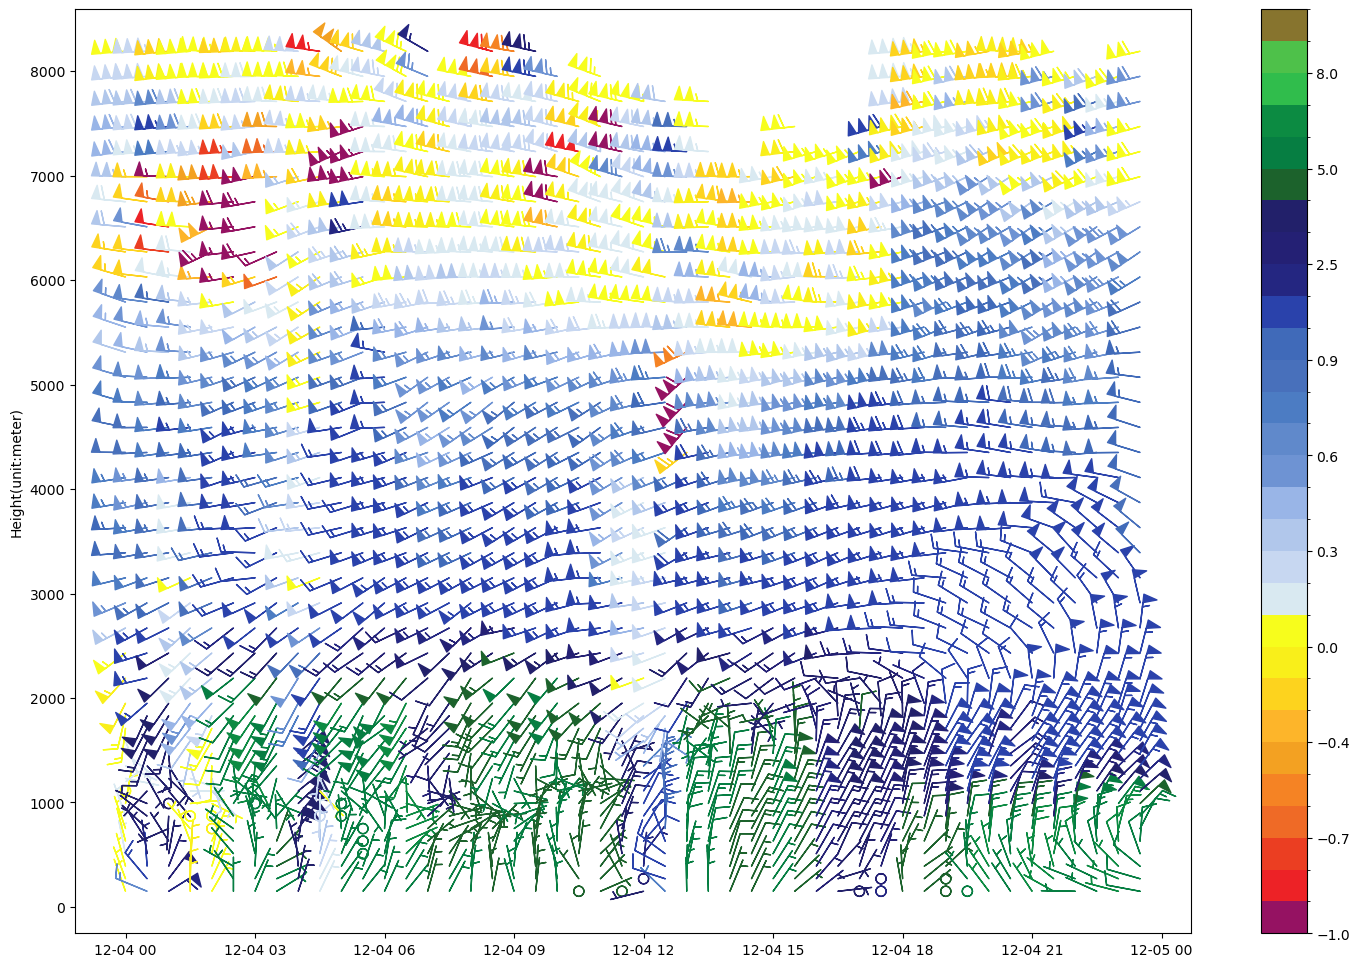

In [66]:
data=np.array(list(map(lambda x:x['data'][['U_Wind_Speed','V_Wind_Speed']].values,ds)))
cdata=np.array(list(map(lambda x:x['data']['Vertical_Wind_Speed'].values,ds)))
# da=xr.DataArray(
#     data,
#     dims=['time','height','wind'],coords={
#     'time':dtlist,
#     'height':heights,
#     'wind':['U_Wind_Speed','V_Wind_Speed']
# })
# gheights,gtimes=np.meshgrid(da.height,da.time)
gtimes,gheights=np.meshgrid(heights,dtlist)
# 绘制凤羽图
# 首先创建一个 figure 对象，
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(1, 1, 1)
# 绘制凤羽图，ax.barbs 有四个参数是必须的，第一个 x 表示绘制凤羽的 x 坐标，第二个 y 表示绘制凤羽的 y 坐标，第三个为 u风 ，第四个为 v风
# 由于我们只对一个 风廓线实时产品数据文件进行绘制，所以 x 坐标不变
cb=ax.barbs(
    gheights[::5],gtimes[::5],  data[::5,:,0], data[::5,:,1],
    cdata[::5],
    cmap=WindProfileRadar.velocity_cmap,
    norm=WindProfileRadar.velocity_norm,
    barb_increments=dict(half=2, full=5, flag=10)  # 该行是定义绘制风羽的标准
)
# 添加垂直坐标的标签
ax.set_ylabel('Height(unit:meter)')
plt.colorbar(cb)
plt.show()

![](./Images/fkxWind.png)